In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('NJD_TWITTER_DATATHON_clean.xlsx', index_col=None, header=[0])
df.head(3)

,CONTENT_TYPE,DATE,TIMESTAMP,BRAND,IMPACT,ENGAGEMENT,CONTENT_HASHTAGS,CHANNEL_INFO_CHANNEL,CHANNEL_INFO_TYPE,CONTENT_TEXT,CONTENT_LINK_TITLE,CONTENT_RETWEET_COUNT,CONTENT_FAVORITE_COUNT,GAMERESULTS
0,tweet,2022-01-31,2022-01-31 09:51:47,172721,0.4970,151,NaN,twitter,photo,Lets close this trip out on a high.\n\nâ°: 7:...,NaN,10,141,LOSS
1,tweet,2022-01-31,2022-01-31 10:18:00,172721,1.8650,632,NEWS,twitter,link,#NEWS: Due to the recent passing of his father...,Ruff to Miss Two Games with Passing of his Fat...,61,571,LOSS
2,tweet,2022-01-31,2022-01-31 12:07:05,172721,0.6897,231,NaN,twitter,photo,Putting in work up north. https://t.co/yoYZGN3xeO,NaN,10,221,LOSS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17270 entries, 0 to 17269
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CONTENT_TYPE            17270 non-null  object        
 1   DATE                    17270 non-null  datetime64[ns]
 2   TIMESTAMP               17270 non-null  datetime64[ns]
 3   BRAND                   17270 non-null  int64         
 4   IMPACT                  17270 non-null  float64       
 5   ENGAGEMENT              17270 non-null  int64         
 6   CONTENT_HASHTAGS        10174 non-null  object        
 7   CHANNEL_INFO_CHANNEL    17270 non-null  object        
 8   CHANNEL_INFO_TYPE       17270 non-null  object        
 9   CONTENT_TEXT            15902 non-null  object        
 10  CONTENT_LINK_TITLE      4380 non-null   object        
 11  CONTENT_RETWEET_COUNT   17270 non-null  int64         
 12  CONTENT_FAVORITE_COUNT  17270 non-null  int64 

In [4]:
#drop : single value
df.CONTENT_TYPE.value_counts()

tweet    17270
Name: CONTENT_TYPE, dtype: int64

In [5]:
##drop : single value
df.BRAND.value_counts(dropna=False,normalize = True)

172721    1.0
Name: BRAND, dtype: float64

In [6]:
df.IMPACT.describe()

count    17270.000000
mean         0.893296
std          1.859127
min          0.000000
25%          0.236400
50%          0.448300
75%          0.927400
max        107.860900
Name: IMPACT, dtype: float64

<AxesSubplot:>

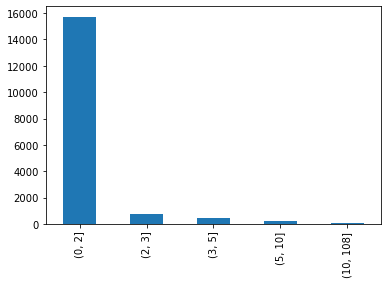

In [7]:
mydata = pd.DataFrame()
mydata["bins"] = pd.cut(df.IMPACT, [0,2,3,5,10,108])
mydata["bins"].value_counts().plot.bar()

In [8]:
df.IMPACT.describe()

count    17270.000000
mean         0.893296
std          1.859127
min          0.000000
25%          0.236400
50%          0.448300
75%          0.927400
max        107.860900
Name: IMPACT, dtype: float64

In [9]:
df.ENGAGEMENT.describe()

count    17270.000000
mean       276.467169
std        605.467163
min          0.000000
25%         64.000000
50%        127.000000
75%        279.000000
max      27010.000000
Name: ENGAGEMENT, dtype: float64

<AxesSubplot:>

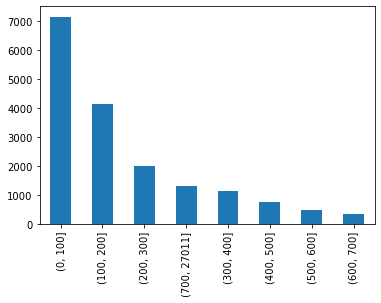

In [10]:
mydata["bins"] = pd.cut(df.ENGAGEMENT, [0,100,200,300,400,500,600,700,27011])
mydata["bins"].value_counts().plot.bar()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17270 entries, 0 to 17269
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   CONTENT_TYPE            17270 non-null  object        
 1   DATE                    17270 non-null  datetime64[ns]
 2   TIMESTAMP               17270 non-null  datetime64[ns]
 3   BRAND                   17270 non-null  int64         
 4   IMPACT                  17270 non-null  float64       
 5   ENGAGEMENT              17270 non-null  int64         
 6   CONTENT_HASHTAGS        10174 non-null  object        
 7   CHANNEL_INFO_CHANNEL    17270 non-null  object        
 8   CHANNEL_INFO_TYPE       17270 non-null  object        
 9   CONTENT_TEXT            15902 non-null  object        
 10  CONTENT_LINK_TITLE      4380 non-null   object        
 11  CONTENT_RETWEET_COUNT   17270 non-null  int64         
 12  CONTENT_FAVORITE_COUNT  17270 non-null  int64 

In [12]:
#41 % misisng values
df.CONTENT_HASHTAGS.value_counts(dropna=False,normalize = True)        

NaN                         0.410886
NJDevils                    0.155646
WeAreTheOnes NJDevils       0.054951
WeAreOne NJDevils           0.018703
NEWS                        0.009612
                              ...   
WeAreTheOnes NJDvsBUF       0.000058
OutOfOffice                 0.000058
NJDevils ThreeThings        0.000058
SpeakoftheDeivls            0.000058
NJDevils NJDAllAccessPod    0.000058
Name: CONTENT_HASHTAGS, Length: 1314, dtype: float64

In [13]:
#drop
df.CHANNEL_INFO_CHANNEL.value_counts(dropna=False,normalize = True)  

twitter    1.0
Name: CHANNEL_INFO_CHANNEL, dtype: float64

In [14]:
df.CHANNEL_INFO_TYPE.value_counts(dropna=False,normalize = True) 

photo             0.663289
link              0.198089
text only         0.099710
photo and link    0.038911
Name: CHANNEL_INFO_TYPE, dtype: float64

In [15]:
df.CONTENT_LINK_TITLE.value_counts(dropna=False,normalize = True)

NaN                                                                    0.746381
New Jersey Devils on Twitter                                           0.031268
YouTube                                                                0.007354
Single-Game Tickets / Theme Nights / Promotions                        0.004517
Health Care Heroes | RWJBarnabas Health                                0.004169
                                                                         ...   
FEATURE: Thompson Anxious, Excited Ahead of NHL Debut                  0.000058
BLOG: Hischier "A Lot Closer To Playing"                               0.000058
PRE-RAW | Lindy Ruff 4.6.21                                            0.000058
RELEASE: Devils and RWJBarnabas Health to Host Hockey Fights Cancer    0.000058
Brodeur, O'Ree, Bettman lead Hockey Hall of Fame Class of 2018         0.000058
Name: CONTENT_LINK_TITLE, Length: 2448, dtype: float64

In [16]:
df.CONTENT_HASHTAGS.value_counts(dropna=False,normalize = True)    

NaN                         0.410886
NJDevils                    0.155646
WeAreTheOnes NJDevils       0.054951
WeAreOne NJDevils           0.018703
NEWS                        0.009612
                              ...   
WeAreTheOnes NJDvsBUF       0.000058
OutOfOffice                 0.000058
NJDevils ThreeThings        0.000058
SpeakoftheDeivls            0.000058
NJDevils NJDAllAccessPod    0.000058
Name: CONTENT_HASHTAGS, Length: 1314, dtype: float64

In [17]:
df.CONTENT_TEXT.value_counts(dropna=False,normalize = True)         

NaN                                                                                                                                                                                                                   0.079213
2-0, them.                                                                                                                                                                                                            0.000463
Tie game.                                                                                                                                                                                                             0.000232
You good?                                                                                                                                                                                                             0.000232
PAIN.                                                                                                       

<AxesSubplot:>

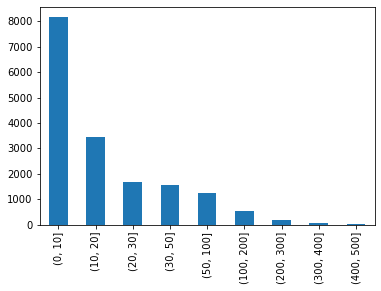

In [18]:
mydata["bins"] = pd.cut(df.CONTENT_RETWEET_COUNT, [0,10,20,30,50,100,200,300,400,500])
mydata["bins"].value_counts().plot.bar()
#        17270 non-null  int64         
#  12    17270 non-null  int64 

In [19]:
df.CONTENT_FAVORITE_COUNT.describe()

count    17270.000000
mean       246.746323
std        533.188265
min          0.000000
25%         58.000000
50%        115.000000
75%        252.000000
max      23602.000000
Name: CONTENT_FAVORITE_COUNT, dtype: float64

<AxesSubplot:>

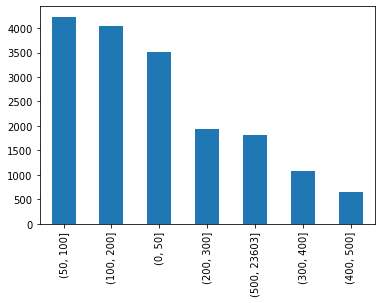

In [20]:
mydata["bins"] = pd.cut(df.CONTENT_FAVORITE_COUNT, [0,50,100,200,300,400,500,23603])
mydata["bins"].value_counts().plot.bar()

In [21]:
df.GAMERESULTS.value_counts()

NO GAME    11640
LOSS        3370
WON         2260
Name: GAMERESULTS, dtype: int64

In [22]:
df.nunique()

CONTENT_TYPE                  1
DATE                       1152
TIMESTAMP                 17230
BRAND                         1
IMPACT                    10042
ENGAGEMENT                 1583
CONTENT_HASHTAGS           1313
CHANNEL_INFO_CHANNEL          1
CHANNEL_INFO_TYPE             4
CONTENT_TEXT              15818
CONTENT_LINK_TITLE         2447
CONTENT_RETWEET_COUNT       426
CONTENT_FAVORITE_COUNT     1470
GAMERESULTS                   3
dtype: int64

In [23]:
del df['CONTENT_TYPE']  
del df['BRAND']
del df['CHANNEL_INFO_CHANNEL']

In [24]:
df.nunique()

DATE                       1152
TIMESTAMP                 17230
IMPACT                    10042
ENGAGEMENT                 1583
CONTENT_HASHTAGS           1313
CHANNEL_INFO_TYPE             4
CONTENT_TEXT              15818
CONTENT_LINK_TITLE         2447
CONTENT_RETWEET_COUNT       426
CONTENT_FAVORITE_COUNT     1470
GAMERESULTS                   3
dtype: int64

In [25]:
df.head(3)

,DATE,TIMESTAMP,IMPACT,ENGAGEMENT,CONTENT_HASHTAGS,CHANNEL_INFO_TYPE,CONTENT_TEXT,CONTENT_LINK_TITLE,CONTENT_RETWEET_COUNT,CONTENT_FAVORITE_COUNT,GAMERESULTS
0,2022-01-31,2022-01-31 09:51:47,0.4970,151,NaN,photo,Lets close this trip out on a high.\n\nâ°: 7:...,NaN,10,141,LOSS
1,2022-01-31,2022-01-31 10:18:00,1.8650,632,NEWS,link,#NEWS: Due to the recent passing of his father...,Ruff to Miss Two Games with Passing of his Fat...,61,571,LOSS
2,2022-01-31,2022-01-31 12:07:05,0.6897,231,NaN,photo,Putting in work up north. https://t.co/yoYZGN3xeO,NaN,10,221,LOSS


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

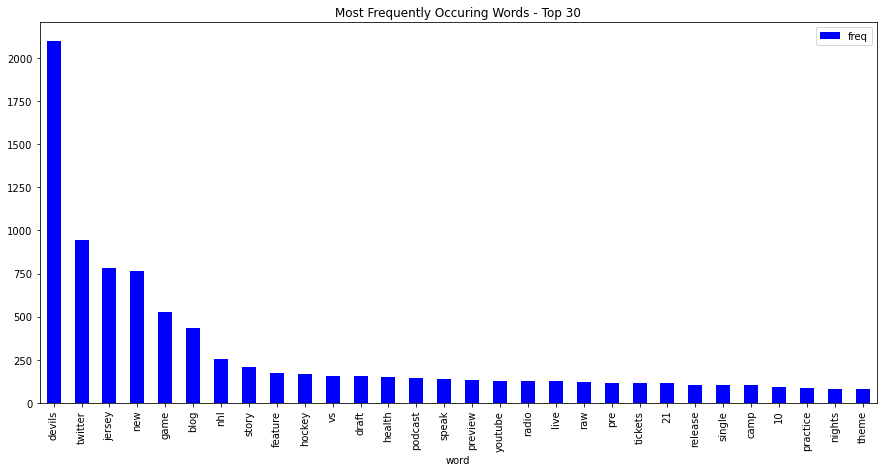

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

df_rna = df[df['CONTENT_LINK_TITLE'].notna()]
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_rna.CONTENT_LINK_TITLE)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [27]:
#pip install wordcloud

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from CONTENT_LINK_TITLE", fontsize = 22)

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
normal_words =' '.join([text for text in df_rna['CONTENT_LINK_TITLE'][df_rna['GAMERESULTS'] == 'WON']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('CONTENT_LINK_TITLE - GAMERESULTS:WON')
plt.show()

In [ ]:
df['clean_CONTENT_TEXT'] = df['CONTENT_TEXT'].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

df_rna = df[df['clean_CONTENT_TEXT'].notna()]
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['https','njdevils','nan']
stopwords.extend(newStopWords)


cv = CountVectorizer(stop_words = stopwords)
words = cv.fit_transform(df_rna.clean_CONTENT_TEXT)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [ ]:
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from CONTENT_LINK_TITLE", fontsize = 22)

In [ ]:
normal_words =' '.join([text for text in df_rna['clean_CONTENT_TEXT'][df_rna['GAMERESULTS'] == 'WON']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('clean_CONTENT_TEXT - clean_CONTENT_TEXT:WON')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df_rna['clean_CONTENT_TEXT'][df_rna['GAMERESULTS'] == 'LOSS']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('clean_CONTENT_TEXT - clean_CONTENT_TEXT:LOSS')
plt.show()

In [ ]:
normal_words =' '.join([text for text in df_rna['clean_CONTENT_TEXT'][df_rna['GAMERESULTS'] == 'NO GAME']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('clean_CONTENT_TEXT - clean_CONTENT_TEXT:LOSS')
plt.show()

In [ ]:
#pip install plotly

In [ ]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# Product Scores
fig = px.histogram(df, x="IMPACT")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='IMPACT')
fig.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
# Create stopword list:

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['https','NJDevils','nan']
stopwords.extend(newStopWords)
textt = " ".join(review for review in df_rna.clean_CONTENT_TEXT)
wordcloud = WordCloud(width=800, height=500,stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
df.IMPACT.describe()

In [ ]:
df.IMPACT.median()

In [ ]:
#TAKING IMPACT ABOVE 75% AS POSITIVE
df['sentiment'] =  np.where(df['IMPACT'] >0.927400,1,0)

In [ ]:
df['sentiment'].value_counts()

In [ ]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

df_rna = df[df['clean_CONTENT_TEXT'].notna()]
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['https','njdevils','nan','co']
stopwords.extend(newStopWords)


cv = CountVectorizer(stop_words = stopwords)
words = cv.fit_transform(positive.clean_CONTENT_TEXT)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring positive sentiments Words - Top 10")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(positive.clean_CONTENT_TEXT)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram.head(10).plot(x='bigram/trigram', y='frequency', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring positive sentiments Words - Top 10")

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['https','NJDevils','nan','game','CO']
stopwords.extend(newStopWords)
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.clean_CONTENT_TEXT)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

df_rna = df[df['clean_CONTENT_TEXT'].notna()]
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['https','njdevils','nan','co']
stopwords.extend(newStopWords)


cv = CountVectorizer(stop_words = stopwords)
words = cv.fit_transform(negative.clean_CONTENT_TEXT)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Negative sentiment Words - Top 10")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stopwords, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(negative.clean_CONTENT_TEXT)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram.head(10).plot(x='bigram/trigram', y='frequency', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words for Negative sentiment- Top 10")

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['https','NJDevils','nan','game','CO']
stopwords.extend(newStopWords)
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in negative.clean_CONTENT_TEXT)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['sentiment_analysis'] = df['sentiment'].replace({0 : 'negative'})
df['sentiment_analysis'] = df['sentiment'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentiment_analysis")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='CONTENT_TEXT Sentiment')
fig.show()